<a href="https://colab.research.google.com/github/matheusmf1/ECM514_Data_Science/blob/master/heart_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 03 - Heart Analysis
Matheus Mandotti RA: 16.00177-0



Criar 3 classificadores utilizando todas as features, e os mesmos 3 classificadores utilizando apenas 5 features.

Classificadores: 
- Decision Tree
- Random Forest
- KNN


## Importações

In [68]:
#Bibliotecas utilizadas para classificação e exportação da árvore gerada
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#Biblioteca para facilitar a separação dos dataset em dados de traino e teste
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
#Pandas é uma biblioteca que facilita a ingestão e manipulação de dados
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)


#enabling to plot using plotlib in the notebook
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [69]:
df = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/Data Science Class/DataSets/heart/heart_.csv' )
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,yes
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,yes
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,yes
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,yes
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,0,1,123,1,0.2,1,0,3,no
299,45,male,3,110,264,0,1,132,0,1.2,1,0,3,no
300,68,male,0,144,193,1,1,141,0,3.4,1,2,3,no
301,57,male,0,130,131,0,1,115,1,1.2,1,1,3,no


###### Sex: Male(0), Female(1)

In [0]:
df['sex'] = df[ 'sex' ].map( { 'male':0, 'female': 1 } )

###### Target: yes(1), no(0)

In [0]:
df['target'] = df[ 'target' ].map( { 'yes':1,'no':0 } )

## Analisando com todas as features

In [72]:
nome_features = df.columns[ :13 ]
nome_features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [73]:
df_x = df.filter( nome_features )
df_x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,0,3,145,233,1,0,150,0,2.3,0,0,1
1,37,0,2,130,250,0,1,187,0,3.5,0,0,2
2,41,1,1,130,204,0,0,172,0,1.4,2,0,2
3,56,0,1,120,236,0,1,178,0,0.8,2,0,2
4,57,1,0,120,354,0,1,163,1,0.6,2,0,2


In [74]:
df_y = df[ df.columns[ 13 ] ]
df_y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [75]:
df_y.shape

(303,)

In [0]:
x_treino, x_teste, y_treino, y_teste =  train_test_split( df_x, df_y, test_size = 0.3, random_state = 30 )

In [77]:
x_treino.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
6,56,1,1,140,294,0,0,153,0,1.3,1,0,2
139,64,0,0,128,263,0,1,105,1,0.2,1,1,3
28,65,1,2,140,417,1,0,157,0,0.8,2,1,2
37,54,0,2,150,232,0,0,165,0,1.6,2,0,3
224,54,0,0,110,239,0,1,126,1,2.8,1,1,3


In [78]:
x_teste.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
97,52,0,0,108,233,1,1,147,0,0.1,2,3,3
122,41,1,2,112,268,0,0,172,1,0.0,2,0,2
84,42,1,0,102,265,0,0,122,0,0.6,1,0,2
231,57,0,0,165,289,1,0,124,0,1.0,1,3,3
110,64,1,0,180,325,0,1,154,1,0.0,2,0,2


In [79]:
y_treino.head()

6      1
139    1
28     1
37     1
224    0
Name: target, dtype: int64

In [80]:
y_teste.head()

97     1
122    1
84     1
231    0
110    1
Name: target, dtype: int64

## Criando um classificador Decision Tree

In [81]:
classificador = DecisionTreeClassifier()

classificador.fit( x_treino, y_treino )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
classificador.score( x_teste, y_teste )

0.7472527472527473

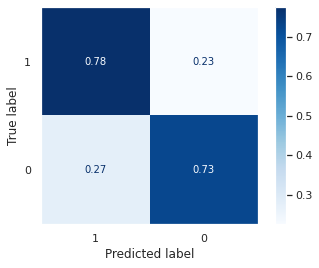

In [83]:
plot_confusion_matrix( estimator = classificador, X = x_teste, y_true = y_teste, display_labels = df['target'].unique(), cmap=plt.cm.Blues, normalize = 'true' )
plt.grid( False )

## Criando um classificador Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classificador_rf = RandomForestClassifier( n_estimators = 100, n_jobs= -1 )

classificador_rf.fit( x_treino, y_treino )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
y_pred = classificador_rf.predict( x_teste )

In [145]:
classificador_rf.score( x_teste, y_teste )

0.8241758241758241

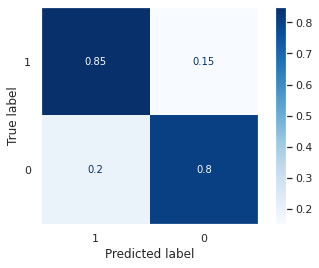

In [139]:
plot_confusion_matrix( estimator = classificador_rf, X = x_teste, y_true = y_teste, display_labels = df['target'].unique(), cmap=plt.cm.Blues, normalize = 'true' )
plt.grid( False )

## Criando um classificador KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier

classificador_knn = KNeighborsClassifier( n_neighbors = 8 )
classificador_knn.fit( x_treino, y_treino )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [0]:
y_pred = classificador_knn.predict( x_treino )

In [143]:
classificador_knn.score( x_teste, y_teste )

0.5714285714285714

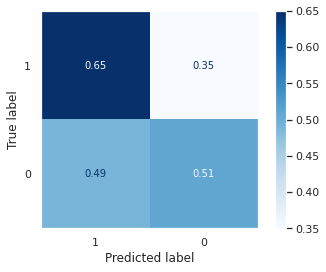

In [142]:
plot_confusion_matrix( estimator = classificador_knn, X = x_teste, y_true = y_teste, display_labels = df['target'].unique(), cmap=plt.cm.Blues, normalize = 'true' )
plt.grid( False )

# Analisando com Features Selecionadas

In [89]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,0.098447,1.000000,0.049353,0.056769,0.197912,-0.045032,0.058196,0.044020,-0.141664,-0.096093,0.030711,-0.118261,-0.210041,0.280937
cp,-0.068653,0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,-0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,-0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,-0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [104]:
selected_features = df.filter( ['cp', 'thalach', 'sex','slope', 'trestbps'] )
selected_features.head()

,cp,thalach,sex,slope,trestbps
0,3,150,0,0,145
1,2,187,0,0,130
2,1,172,1,2,130
3,1,178,0,2,120
4,0,163,1,2,120


In [0]:
x_treino2, x_teste2, y_treino2, y_teste2 =  train_test_split( selected_features, df_y, test_size = 0.3, random_state = 30 )

In [106]:
x_treino2.head()

,cp,thalach,sex,slope,trestbps
6,1,153,1,1,140
139,0,105,0,1,128
28,2,157,1,2,140
37,2,165,0,2,150
224,0,126,0,1,110


In [107]:
x_teste2.head()

,cp,thalach,sex,slope,trestbps
97,0,147,0,2,108
122,2,172,1,2,112
84,0,122,1,1,102
231,0,124,0,1,165
110,0,154,1,2,180


In [108]:
y_treino2.head()

6      1
139    1
28     1
37     1
224    0
Name: target, dtype: int64

In [109]:
y_teste2.head()

97     1
122    1
84     1
231    0
110    1
Name: target, dtype: int64

## Classificadores

### Desicion Tree

In [110]:
classificador_dt = DecisionTreeClassifier()

classificador_dt.fit( x_treino2, y_treino2 )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [111]:
classificador_dt.score( x_teste2, y_teste2 )

0.6703296703296703

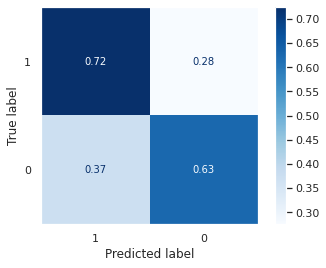

In [112]:
plot_confusion_matrix( estimator = classificador_dt, X = x_teste2, y_true = y_teste2, display_labels = df['target'].unique(), cmap=plt.cm.Blues, normalize = 'true' )
plt.grid( False )

### Random Forest

In [122]:
classificador_rf = RandomForestClassifier( n_estimators = 100, n_jobs= -1 )

classificador_rf.fit( x_treino2, y_treino2 )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
y_pred = classificador_rf.predict( x_teste2 )

In [128]:
classificador_rf.score( x_teste2, y_teste2 )

0.7032967032967034

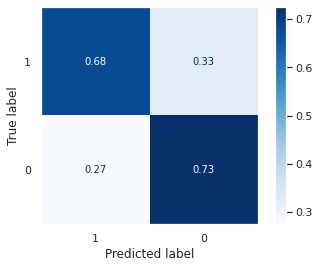

In [129]:
plot_confusion_matrix( estimator = classificador_rf, X = x_teste2, y_true = y_teste2, display_labels = df['target'].unique(), cmap=plt.cm.Blues, normalize = 'true' )
plt.grid( False )

### KNN

In [114]:
classificador_knn = KNeighborsClassifier( n_neighbors = 8 )
classificador_knn.fit( x_treino2, y_treino2 )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [0]:
y_pred = classificador_knn.predict( x_treino2 )

In [117]:
classificador_knn.score( x_teste2, y_teste2 )

0.6043956043956044

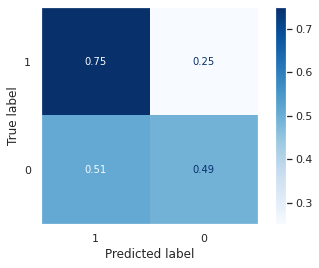

In [116]:
plot_confusion_matrix( estimator = classificador_knn, X = x_teste2, y_true = y_teste2, display_labels = df['target'].unique(), cmap=plt.cm.Blues, normalize = 'true' )
plt.grid( False )